In [79]:
from MultiTrackingSystem import MultiTrackingSystem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median')


In [81]:
folder = r'./2019-6-17-10-0-0-BF1(0-18000frames)/{}'
frames_name = os.listdir(r'./2019-6-17-10-0-0-BF1(0-18000frames)/')
frames_name.sort(key = lambda x : x.split(' ')[2][:-5])

In [82]:
multi_tracking = MultiTrackingSystem(2400, tolerance= 4,gen_fig= True)

In [83]:
multi_tracking.fit_dbgen(folder, frames_name,1,10)

In [73]:
multi_tracking.batch_tracking()

100%|██████████| 2399/2399 [06:50&lt;00:00,  5.85it/s]


In [74]:
multi_tracking.svae_gif()

Gif successfully saved


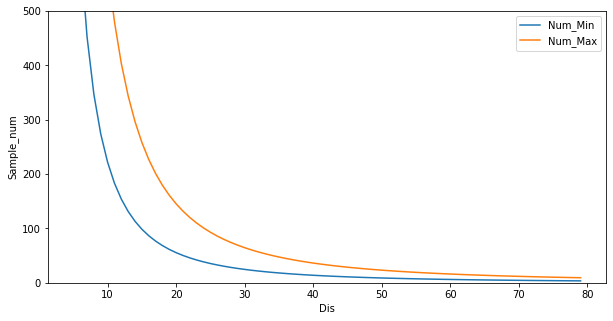

In [47]:
plt.figure(figsize=(10,5))
x = np.arange(5,80,1)
y1 = 2.66/(0.00012*x**2)
y2 = 6.97/(0.00012*x**2)
plt.ylim(0,500)
plt.plot(x, y1, label = 'Num_Min')
plt.plot(x, y2, label = 'Num_Max')
plt.legend()
plt.xlabel('Dis')
plt.ylabel('Sample_num')
plt.show()

In [54]:
tabel = pd.DataFrame({
    'Dis':x,
    'Num_min':y1,
    'Num_max':y2
})

In [60]:
tabel.loc[tabel.Dis == 15]

,Dis,Num_min,Num_max
10,15,98.518519,258.148148


In [25]:
2.66/((18.5**2)*0.00012)

64.76747017287558

In [22]:
np.sin((.2/180)*np.pi/2)*np.tan((2/180)*np.pi/2)*4

0.00012185927979125952

In [19]:
np.tan((2/180)*np.pi/2)

0.017455064928217585

In [17]:
1.4*1.9

2.6599999999999997

In [16]:
np.sqrt(4.6**2+1.9**2)*1.4

6.967725597352409

In [67]:
390.44/(1.47*45)

5.9023431594860165

In [66]:
90.44/(1.47*45)

1.367195767195767

In [62]:
1.47*45*4

264.6

In [9]:
length = []
for key in range(len(multi_tracking.out_of_tracking_list.keys())):
    length.append(len(multi_tracking.out_of_tracking_list[key].detected_centers))
    

In [15]:
length = np.array(length)

In [73]:
np.where((length>120))

(array([  5,   7,  57, 101, 167, 285, 368, 376]),)

In [50]:
length.argmax()

368

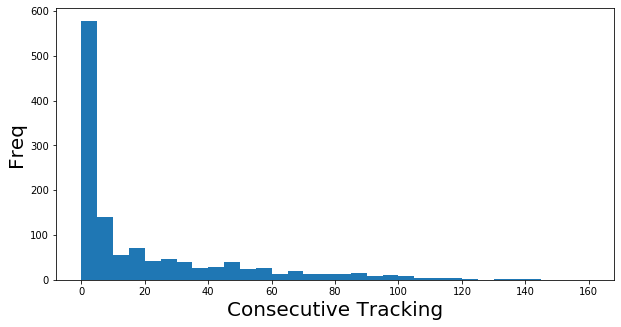

In [17]:
plt.figure(figsize=(10,5))
plt.hist(length,bins=np.arange(0,165,5))
plt.xlabel('Consecutive Tracking',fontsize = 20)
plt.ylabel('Freq',fontsize = 20)
plt.show()

In [56]:
x_lim = [-80, 70]
y_lim = [-20, 60]

In [91]:
def show_detected_traj(obj):
    plt.figure(figsize=(10,5))
    # plt.ylim(y_lim[0],y_lim[1]) # figure height is 80
    # plt.xlim(x_lim[0],x_lim[1]) # length is 150
    detected_centers = np.concatenate([obj.detected_centers[i].reshape(1,-1) for i in range(len(obj.detected_centers)) if type              (obj.detected_centers[i]) != int])
    estimated_centers = np.concatenate([obj.estimated_centers[i].reshape(1,-1) for i in range(len(obj.estimated_centers))])
    detected_point_clouds = np.concatenate([obj.point_clouds[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]     ) != int])
    detected_box = [obj.bounding_boxes[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]) != int]
    plt.plot(estimated_centers[:,0],estimated_centers[:,1],marker = 'o',label = 'Est')
    plt.plot(detected_centers[:,0],detected_centers[:,1], marker = 'x', label = 'Mea')
    plt.legend(fontsize = 20)
    # plt.scatter(detected_point_clouds[:,0],detected_point_clouds[:,1],s = 3)
    # for i in range(len(detected_box)):
    #     plt.plot(detected_box[i][:,0],detected_box[i][:,1],c = 'r',alpha = 0.3) # box
    #     plt.plot(detected_box[i][[0,-1],0],detected_box[i][[0,-1],1],c = 'r',alpha = 0.3)
    plt.show()

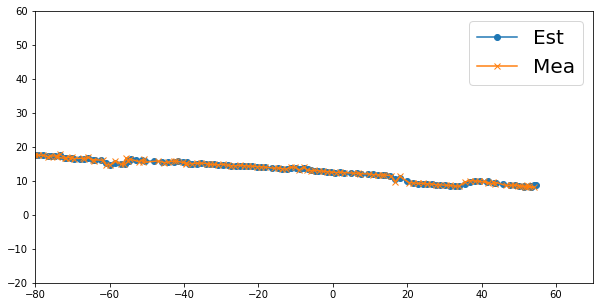

In [92]:
obj = multi_tracking.out_of_tracking_list[57]
show_detected_traj(obj)

In [125]:
def MyDBSCAN(D, eps, MinPts):   
    labels = [0]*len(D)   
    C = 0
    for P in range(0, len(D)):
        if not (labels[P] == 0):
           continue
        NeighborPts = regionQuery(D, P, eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else: 
           C += 1
           labels[P] = C
           growCluster(D, labels, P, C, eps, MinPts)
    return labels


def growCluster(D, labels, P, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    SearchQueue = [P]
    i = 0
    while i < len(SearchQueue):    
        
        P = SearchQueue[i]

        NeighborPts = regionQuery(D, P, eps)

        if len(NeighborPts) < MinPts:
            i += 1
            continue
        

        for Pn in NeighborPts:
           

            if labels[Pn] == -1:
               labels[Pn] = C

            elif labels[Pn] == 0:
                labels[Pn] = C
                
                SearchQueue.append(Pn)
        i += 1        
    

def regionQuery(D, P, eps): # should be modified
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if np.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

In [ ]:
alpha = 0.2


In [93]:
from sklearn.cluster import DBSCAN
from matplotlib import cm

In [113]:
point_cloud = np.array(pd.read_csv(folder.format(frames_name[579])).loc[:,['X','Y']])
label = DBSCAN(eps=2,min_samples=10).fit_predict(X = point_cloud)
uniq_label = np.unique(label)

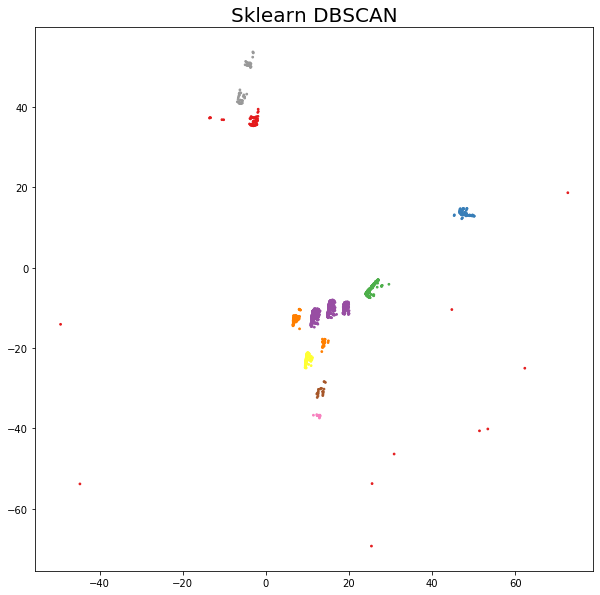

In [118]:
plt.figure(figsize=(10,10))
plt.scatter(point_cloud[:,0],point_cloud[:,1],c = label,s = 3,cmap= cm.Set1)
plt.title(r'Sklearn DBSCAN',fontsize = 20)
plt.show()


In [128]:
point_cloud = np.array(pd.read_csv(folder.format(frames_name[579])).loc[:,['X','Y']])
label = MyDBSCAN(D = point_cloud,eps = 2, MinPts= 10)
uniq_label = np.unique(label)

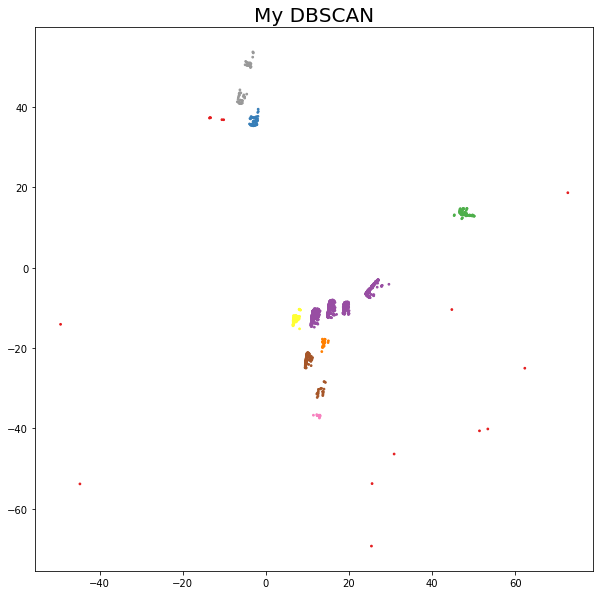

In [129]:
plt.figure(figsize=(10,10))
plt.scatter(point_cloud[:,0],point_cloud[:,1],c = label,s = 3,cmap= cm.Set1)
plt.title(r'My DBSCAN',fontsize = 20)
plt.show()
